In [273]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D, Dropout
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [274]:
# Define the paths to your image and csv folders
train_val_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val"
validation_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val"

test_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\test"
train_path_labels = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [275]:
# load training dataset in numpy array

images = []
labels = []

for filename in os.listdir(train_val_dir): 
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Test : trying to get better accuracy after converting to grayscale       
        
#       img = Image.open(os.path.join(train_val_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)
        
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
        
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')                  
y_train = np.load('y_train.npy')    

In [276]:
x_train.shape

(1000, 128, 128, 3)

In [277]:
x_train[:5]
y_train[:5]

array([0, 1, 2, 3, 4], dtype=int64)

In [278]:
# load test dataset in numpy array

images = []
labels = []

for filename in os.listdir(test_dir): 
    if filename.endswith('.png'): 
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#       img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Test : trying to get better accuracy after converting to grayscale       
#       img = Image.open(os.path.join(test_dir, filename))
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
        
# Convert the lists to NumPy arrays
images = np.array(images) 
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)

x_test = np.load('x_test.npy')                  
y_test = np.load('y_test.npy')    

In [279]:
x_test.shape

(50, 128, 128, 3)

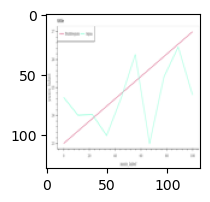

In [280]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [281]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]

# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

y_train
y_train.shape
y_test.shape

(50,)

In [282]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample

def image_sample(x, y, index):
    plt.figure(figsize = (10,2))
    plt.imshow(x[index])
#   image_label = train_val_labels.iloc[index]['type']
#   plt.xlabel(image_label)
    plt.xlabel(image_classes[y[index]])

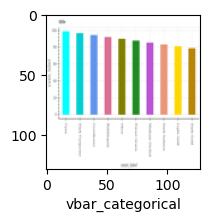

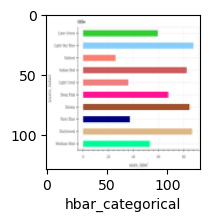

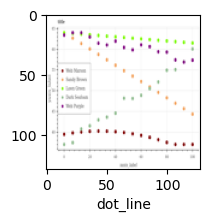

In [283]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,999)

In [219]:
# now we have mapped the corresponding labels to the image

In [220]:
# normalize the image

# x_train[0]/255

x_train=x_train /255
x_test=x_train /255

In [221]:
x_test.shape

(1000, 128, 128, 3)

In [222]:
# take the label for train data from csv file

y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

In [223]:
y_train_type[:5]

0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [224]:
# writing a simple nn to test first

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(128,128,3)), 
#   Flatten(input_shape=(128,128)),  Got 0.4 accuracy on testing on grayscale images
    Dense(3000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 20s 580ms/step - loss: 6.8106 - accuracy: 0.2030
Epoch 2/10
32/32 [==============================] - 18s 545ms/step - loss: 1.6209 - accuracy: 0.2270
Epoch 3/10
32/32 [==============================] - 24s 745ms/step - loss: 1.6218 - accuracy: 0.2260
Epoch 4/10
32/32 [==============================] - 20s 639ms/step - loss: 1.6106 - accuracy: 0.2090
Epoch 5/10
32/32 [==============================] - 20s 619ms/step - loss: 1.6059 - accuracy: 0.2350
Epoch 6/10
32/32 [==============================] - 22s 669ms/step - loss: 1.5988 - accuracy: 0.2630
Epoch 7/10
32/32 [==============================] - 20s 621ms/step - loss: 1.5666 - accuracy: 0.2860
Epoch 8/10
32/32 [==============================] - 21s 649ms/step - loss: 1.5507 - accuracy: 0.3080
Epoch 9/10
32/32 [==============================] - 20s 638ms/step - loss: 1.6399 - accuracy: 0.2490
Epoch 10/10
32/32 [==============================] - 24s 735ms/step - loss: 1.5828 - accura

In [227]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [228]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 1s 218ms/step - loss: 1.5428 - accuracy: 0.3500


[1.5427769422531128, 0.3499999940395355]

In [229]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

5/5 [==============================] - 1s 187ms/step


In [230]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy

In [231]:
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape) 

Train Images Shape: (640, 128, 128, 3)
Train Labels Shape: (640,)
Test Images Shape: (160, 128, 128, 3)
Test Labels Shape: (160,)


Epoch 1/50
1/1 [==============================] - 109s 109s/step - loss: 1.6376 - accuracy: 0.2094 - val_loss: 1.8014 - val_accuracy: 0.1625
Epoch 2/50
1/1 [==============================] - 18s 18s/step - loss: 1.8480 - accuracy: 0.2031 - val_loss: 1.6025 - val_accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 6s 6s/step - loss: 1.6506 - accuracy: 0.1922 - val_loss: 1.6350 - val_accuracy: 0.1750
Epoch 4/50
1/1 [==============================] - 5s 5s/step - loss: 1.6090 - accuracy: 0.2094 - val_loss: 1.5913 - val_accuracy: 0.3688
Epoch 5/50
1/1 [==============================] - 5s 5s/step - loss: 1.5669 - accuracy: 0.3469 - val_loss: 1.5611 - val_accuracy: 0.3812
Epoch 6/50
1/1 [==============================] - 5s 5s/step - loss: 1.5429 - accuracy: 0.3984 - val_loss: 1.5271 - val_accuracy: 0.4187
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 1.5132 - accuracy: 0.4328 - val_loss: 1.4936 - val_accuracy: 0.4688
Epoch 8/50
1/1 [===================

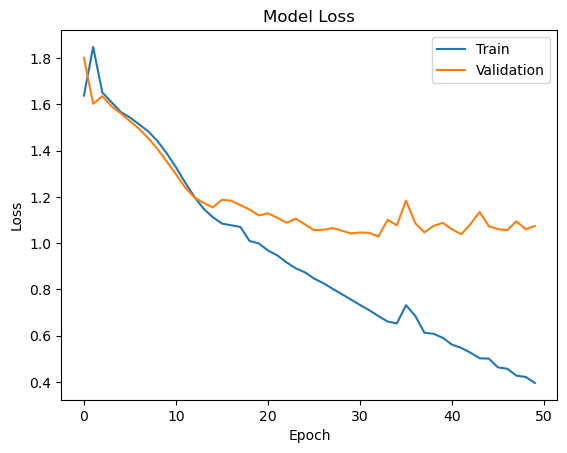

In [236]:
# modify the model architecture to cmnn
cnn_model = Sequential([
    Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),    
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [272]:
cnn_model.evaluate(x_test,y_test)

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\biraj\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\biraj\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\biraj\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\biraj\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\biraj\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\biraj\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\biraj\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\biraj\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\biraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\biraj\AppData\Local\Temp\ipykernel_16936\342563277.py", line 1, in <module>
      cnn_model.evaluate(x_test,y_test)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\training.py", line 1667, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\biraj\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 31 which is outside the valid range of [0, 5).  Label values: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_25524]

In [ ]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [242]:
# Observation:  we can see some wrong predictions


In [243]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

5/5 [==============================] - 1s 55ms/step


array([[1.6605177e-04, 5.7041495e-07, 3.0270326e-06, 1.9604686e-07,
        9.9983013e-01],
       [9.5824013e-03, 1.9404548e-03, 7.2485946e-02, 9.0700394e-01,
        8.9872424e-03],
       [2.2919958e-06, 6.8031654e-06, 4.8948333e-01, 5.1050758e-01,
        2.2592369e-08],
       [6.1865312e-01, 4.4817995e-02, 4.3674134e-02, 1.7264118e-02,
        2.7559066e-01],
       [6.2538552e-01, 7.9335965e-02, 8.8324770e-02, 1.5009702e-02,
        1.9194405e-01]], dtype=float32)

In [244]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[4, 3, 3, 0, 0]

In [245]:
y_test[:5]

array([4, 3, 2, 4, 4])

In [246]:
# here we see some values are not matching


'vbar_categorical'

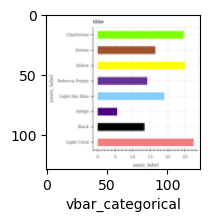

In [247]:
# test actual and predicted

# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
 

# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted

image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [248]:
# some values are not matching


In [249]:
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.60      0.70      0.64        40
           1       0.69      0.85      0.76        26
           2       0.44      0.23      0.30        31
           3       0.59      0.66      0.62        35
           4       0.73      0.68      0.70        28

    accuracy                           0.62       160
   macro avg       0.61      0.62      0.61       160
weighted avg       0.60      0.62      0.60       160



In [250]:
# Generate the confusion matrix 
conf_mat = confusion_matrix(y_test, y_classes)

print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[28  4  2  2  4]
 [ 1 22  0  2  1]
 [11  2  7 11  0]
 [ 2  1  7 23  2]
 [ 5  3  0  1 19]]


Text(95.72222222222221, 0.5, 'Actual')

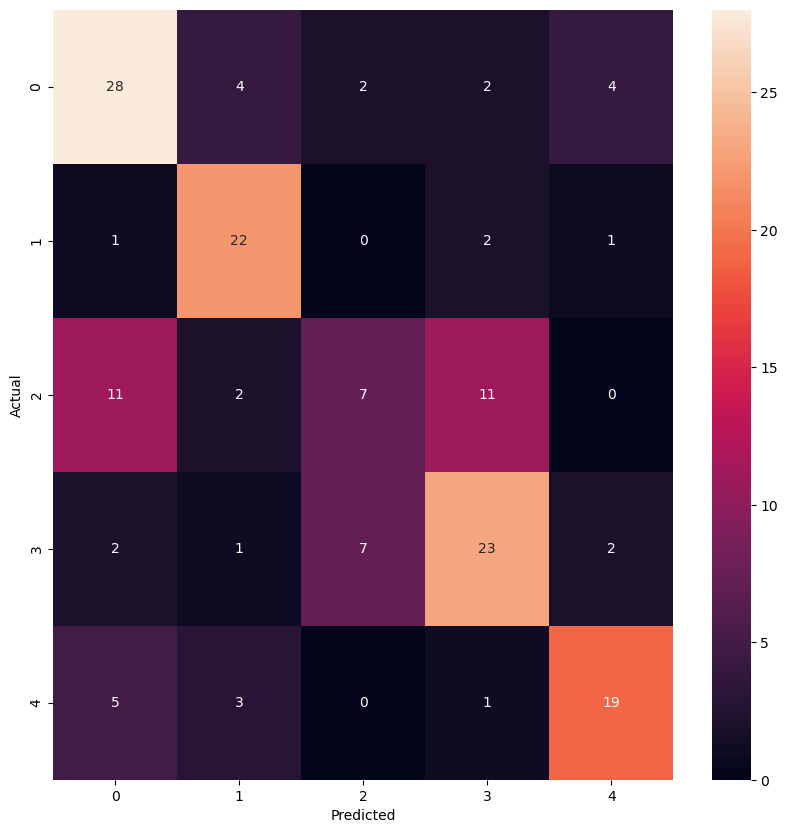

In [251]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [252]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error


In [253]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


In [254]:
# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
    layer.trainable = False


In [255]:
from keras.optimizers import Adam

# Replace the final classification layer with a new layer
x = vgg16_model.output
x = Flatten()(x)
# x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x) 
x = Dropout(0.5)(x)

predictions = Dense(1, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


In [256]:
# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])


In [257]:
# Print the summary of the model architecture
pt_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [258]:
# Set up data generators for image augmentation and feeding data to the model
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [259]:
train_data_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\tra"
val_data_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\train_val"

test_dir = "F:\\M Tech\\FE Sem 2\\Machine Learning\\Neural Networks\\assignment 1\\image classification\\charts\\test"


In [260]:
# flow method generates batches of augmented data
train_generator =  train_datagen.flow_from_directory(
    train_data_dir, 
    target_size=(224, 224), 
    batch_size=16, 
    class_mode='binary')
 
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(224, 224), 
    batch_size=16, 
    class_mode='binary')
    

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [234]:
os.listdir(train_data_dir)

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '17

In [160]:
# Train the model with early stopping

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

history = pt_model.fit(train_generator, epochs=100, validation_data=val_generator, callbacks=[es])


ValueError: Asked to retrieve element 0, but the Sequence has length 0